In [1]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)


Automatically created module for IPython interactive environment


In [3]:
# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
X

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.]])

In [5]:
# Observations
y = f(X).ravel()
y

array([ 0.84147098,  0.42336002, -4.79462137, -1.67649299,  4.59890619,
        7.91486597])

In [9]:
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T


In [11]:

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [25]:
dir(gp.kernel_)
gp.kernel_.hyperparameters

[Hyperparameter(name='k1__constant_value', value_type='numeric', bounds=array([[  1.00000000e-03,   1.00000000e+03]]), n_elements=1, fixed=False),
 Hyperparameter(name='k2__length_scale', value_type='numeric', bounds=array([[  1.00000000e-02,   1.00000000e+02]]), n_elements=1, fixed=False)]

In [12]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [13]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)


In [19]:
sigma

array([ 1.14093179,  1.12392737,  1.10819961,  1.09379185,  1.0807423 ,
        1.06908325,  1.05884031,  1.05003178,  1.04266805,  1.03675117,
        1.03227461,  1.02922317,  1.02757308,  1.02729227,  1.02834082,
        1.0306716 ,  1.03423097,  1.03895961,  1.04479343,  1.05166447,
        1.05950181,  1.06823247,  1.07778221,  1.08807635,  1.09904038,
        1.11060063,  1.12268473,  1.13522207,  1.14814412,  1.16138472,
        1.17488026,  1.18856985,  1.20239541,  1.2163017 ,  1.23023635,
        1.24414988,  1.2579956 ,  1.27172963,  1.28531077,  1.29870047,
        1.31186275,  1.32476409,  1.33737336,  1.34966176,  1.36160269,
        1.37317171,  1.38434643,  1.39510648,  1.40543338,  1.41531052,
        1.4247231 ,  1.43365801,  1.44210385,  1.45005084,  1.45749075,
        1.46441689,  1.47082407,  1.47670853,  1.4820679 ,  1.48690121,
        1.49120878,  1.49499228,  1.4982546 ,  1.50099991,  1.50323355,
        1.50496206,  1.50619312,  1.50693554,  1.50719921,  1.50

In [14]:


# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')


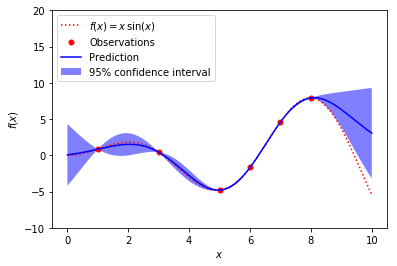

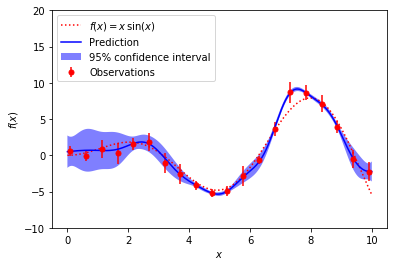

In [15]:
# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [28]:
from sklearn.datasets import fetch_mldata
data = fetch_mldata('mauna-loa-atmospheric-co2').data
data[0]

array([  315.42,  1959.  ])